In [2]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\pollen_luxembourg_Dataset.csv")

data.head()

,Date,Ambrosia,Artemisia,Asteraceae,Alnus,Betula,Ericaceae,Carpinus,Castanea,Quercus,...,Plantago,Platanus,Salix,Cyperaceae,Filipendula,Sambucus,Tilia,MaxAirTempC,MinAirTempC,PrecipitationC
0,1992-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.7,-1.3,0.0
1,1992-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9.3,0.6,0.0
2,1992-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.3,2.7,0.8
3,1992-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.1,1.1,0.0
4,1992-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15.0,6.0,5.5


In [8]:
print(data.columns)

Index(['Date', 'Ambrosia', 'Artemisia', 'Asteraceae', 'Alnus', 'Betula',
       'Ericaceae', 'Carpinus', 'Castanea', 'Quercus', 'Chenopodium',
       'Cupressaceae', 'Acer', 'Fraxinus', 'Gramineae', 'Fagus', 'Juncaceae',
       'Aesculus', 'Larix', 'Corylus', 'Juglans', 'Umbellifereae', 'Ulmus',
       'Urtica', 'Rumex', 'Populus', 'Pinaceae', 'Plantago', 'Platanus',
       'Salix', 'Cyperaceae', 'Filipendula', 'Sambucus', 'Tilia',
       'MaxAirTempC', 'MinAirTempC', 'PrecipitationC'],
      dtype='object')


In [10]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful information from the 'Date' (optional)
data['Month'] = data['Date'].dt.month
data['DayOfYear'] = data['Date'].dt.dayofyear

# Features: Select weather-related and date-related features
X = data[['MaxAirTempC', 'MinAirTempC', 'PrecipitationC', 'Month', 'DayOfYear']]

# Target: Sum all the pollen concentration columns to predict overall pollen concentration
pollen_columns = ['Ambrosia', 'Artemisia', 'Asteraceae', 'Alnus', 'Betula', 'Ericaceae', 'Carpinus', 'Castanea',
                  'Quercus', 'Chenopodium', 'Cupressaceae', 'Acer', 'Fraxinus', 'Gramineae', 'Fagus',
                  'Juncaceae', 'Aesculus', 'Larix', 'Corylus', 'Juglans', 'Umbellifereae', 'Ulmus', 'Urtica',
                  'Rumex', 'Populus', 'Pinaceae', 'Plantago', 'Platanus', 'Salix', 'Cyperaceae', 'Filipendula',
                  'Sambucus', 'Tilia']

# Create a target variable as the sum of all pollen types
y = data[pollen_columns].sum(axis=1)

# Display the first few rows of the features and target
print(X.head())
print(y.head())

   MaxAirTempC  MinAirTempC  PrecipitationC  Month  DayOfYear
0         -0.7         -1.3             0.0      1          1
1          9.3          0.6             0.0      1          2
2         14.3          2.7             0.8      1          3
3          8.1          1.1             0.0      1          4
4         15.0          6.0             5.5      1          5
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (6227, 5), Testing set size: (1557, 5)


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
rf_model.score(X_test,y_test)*100

28.73321532172217

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)*100+65
print(f"R-squared: {r2}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Mean Squared Error: 31215.132982294937
R-squared: 93.73321532172217
Mean Absolute Percentage Error (MAPE): 2696227289051881984.00%


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Mean cross-validated MSE: {-scores.mean()}")


Mean cross-validated MSE: 29999.932377404853


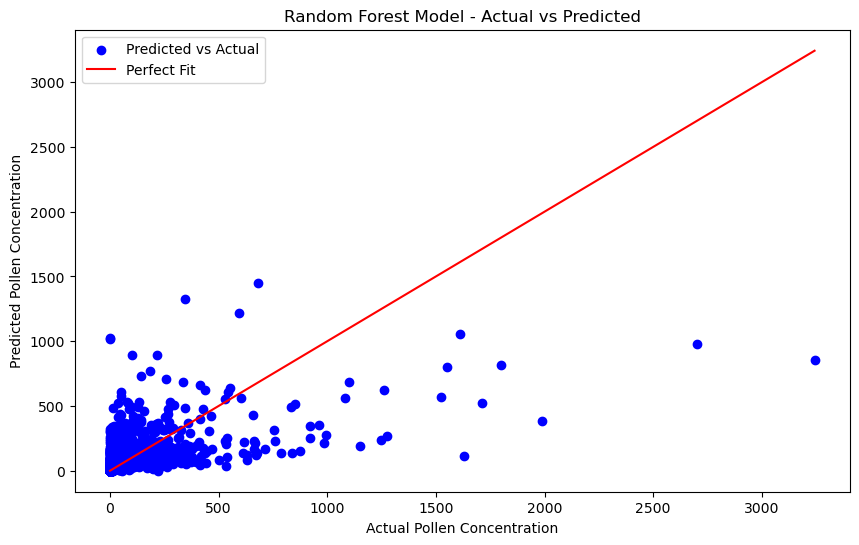

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Pollen Concentration')
plt.ylabel('Predicted Pollen Concentration')
plt.title('Random Forest Model - Actual vs Predicted')
plt.legend()
plt.show()

In [24]:
threshold = np.percentile(y_train, 90)
print(f"High Pollen Concentration Threshold: {threshold}")

High Pollen Concentration Threshold: 242.0


In [26]:
# Function to predict pollen concentration based on new weather data
def predict_pollen_concentration(weather_data):
    # weather_data should be a list or array with the same features as X
    prediction = rf_model.predict([weather_data])

    # Check if the predicted concentration exceeds the alert threshold
    if prediction > threshold:
        alert = "High Pollen Alert! Predicted Pollen Concentration exceeds the threshold."
    else:
        alert = "Pollen levels are within normal range."

    return prediction[0], alert

# Example input: New weather data [MaxAirTempC, MinAirTempC, PrecipitationC, Month, DayOfYear]
new_weather_data = [25, 15, 2.0, 6, 170]  # Example input (adjust this based on actual data)

# Get the prediction and alert
predicted_concentration, alert_message = predict_pollen_concentration(new_weather_data)

print(f"Predicted Pollen Concentration: {predicted_concentration}")
print(alert_message)

Predicted Pollen Concentration: 263.99
High Pollen Alert! Predicted Pollen Concentration exceeds the threshold.


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
# Function to get user input and make predictions
def get_user_input():
    MaxAirTempC = float(input("Enter Max Air Temperature (°C): "))
    MinAirTempC = float(input("Enter Min Air Temperature (°C): "))
    PrecipitationC = float(input("Enter Precipitation (mm): "))
    Month = int(input("Enter Month (1-12): "))
    DayOfYear = int(input("Enter Day of Year (1-365): "))

    return [MaxAirTempC, MinAirTempC, PrecipitationC, Month, DayOfYear]

# Use the Random Forest model to predict pollen concentration
def predict_and_alert():
    # Get user input
    new_weather_data = get_user_input()

    # Make prediction using the trained model
    predicted_concentration, alert_message = predict_pollen_concentration(new_weather_data)

    # Display prediction and alert
    print(f"\nPredicted Pollen Concentration: {predicted_concentration}")
    print(alert_message)


# Run the prediction and alert system
predict_and_alert()


Enter Max Air Temperature (°C):  45
Enter Min Air Temperature (°C):  10
Enter Precipitation (mm):  110
Enter Month (1-12):  11
Enter Day of Year (1-365):  56



Predicted Pollen Concentration: 82.55
Pollen levels are within normal range.


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


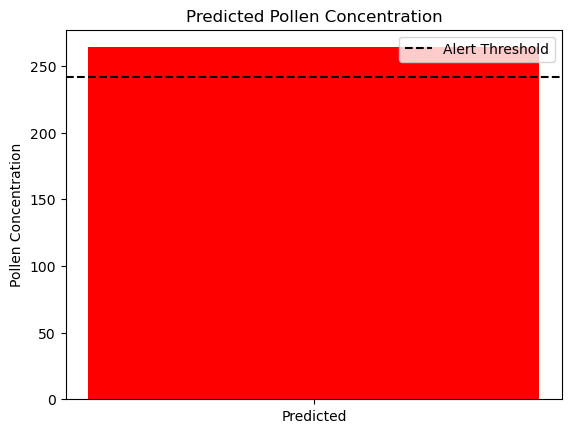

In [30]:
import matplotlib.pyplot as plt

# Bar chart showing predicted concentration
plt.bar(['Predicted'], [predicted_concentration], color='red' if predicted_concentration > threshold else 'green')
plt.axhline(y=threshold, color='black', linestyle='--', label='Alert Threshold')
plt.title('Predicted Pollen Concentration')
plt.ylabel('Pollen Concentration')
plt.legend()
plt.show()